# Correct stim timing in Baker et al data and upsample

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_plot

FPS_DN = 8.5
DT_DN = 1/FPS_DN
NT_DN = 300


FPS = 30.03
DT = 1/FPS

TRESAMPLE = np.arange(0, 30, DT)

COL_START_RSP = 6
ISTART_STIM, ISTOP_STIM = (85, 171)

NNRN = 224

LOAD_FILE = 'data/simple/neur/baker.csv'
SAVE_FILE = 'data/simple/neur/baker_resampled.csv'

In [8]:
df = pd.read_csv(LOAD_FILE)
df

EXPT_ID STIM        LINE  FLY    ROI  ROI_USED      IT_0      IT_1  \
0          0    S      R70G01    0  somas     False -0.286139 -0.251529   
1          0    P      R70G01    0  somas     False -0.090690 -0.071585   
2          1    S      R70G01    1  somas     False -0.074163 -0.052967   
3          1    P      R70G01    1  somas     False -0.094280 -0.175828   
4          2    S      R70G01    2  somas     False -0.359071 -0.296972   
..       ...  ...         ...  ...    ...       ...       ...       ...   
443      221    P  vPN1_split    0  somas     False  0.308926  0.069519   
444      222    S  vPN1_split    1  somas     False  0.268154  0.517779   
445      222    P  vPN1_split    1  somas     False  0.563747  0.506288   
446      223    S  vPN1_split    2  somas     False  0.023391  0.023677   
447      223    P  vPN1_split    2  somas     False  0.064481  0.055382   

         IT_2      IT_3  ...  IT_290  IT_291  IT_292  IT_293  IT_294  IT_295  \
0   -0.214845 -0.085881  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1    0.027546 -0.089212  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2   -0.226459 -0.086673  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3   -0.132839 -0.155376  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4   -0.283760 -0.206650  ...     NaN     NaN     NaN     NaN     NaN     NaN   
..        ...       ...  ...     ...     ...     ...     ...     ...     ...   
443 -0.028961 -0.103122  ...     NaN     NaN     NaN     NaN     NaN     NaN   
444  0.526319  0.353496  ...     NaN     NaN     NaN     NaN     NaN     NaN   
445  0.271983  0.002747  ...     NaN     NaN     NaN     NaN     NaN     NaN   
446  0.009701  0.006185  ...     NaN     NaN     NaN     NaN     NaN     NaN   
447  0.086223  0.063935  ...     NaN     NaN     NaN     NaN     NaN     NaN   

     IT_296  IT_297  IT_298  IT_299  
0       NaN     NaN     NaN     NaN  
1       NaN     NaN     NaN     NaN  
2       NaN     NaN     NaN     NaN  
3       NaN     NaN     NaN     NaN  
4       NaN     NaN     NaN     NaN  
..      ...     ...     ...     ...  
443     NaN     NaN     NaN     NaN  
444     NaN     NaN     NaN     NaN  
445     NaN     NaN     NaN     NaN  
446     NaN     NaN     NaN     NaN  
447     NaN     NaN     NaN     NaN  

[448 rows x 306 columns]

In [10]:
df[df['LINE'] == 'SS23281']

EXPT_ID STIM     LINE  FLY       ROI  ROI_USED      IT_0      IT_1  \
42       21    S  SS23281    0     wedge      True -0.161316  0.143470   
43       21    P  SS23281    0     wedge      True -0.256405 -0.274592   
44       22    S  SS23281    1     wedge      True -0.986439  0.187873   
45       22    P  SS23281    1     wedge      True  0.162906  0.166898   
46       23    S  SS23281    2     wedge      True -0.713592 -0.389985   
47       23    P  SS23281    2     wedge      True -0.281822  0.165099   
48       24    S  SS23281    3     wedge      True  0.094382  0.086938   
49       24    P  SS23281    3     wedge      True  0.397768  0.273140   
50       25    S  SS23281    0     somas     False -0.450375  0.036519   
51       25    P  SS23281    0     somas     False  0.771849  0.173295   
52       26    S  SS23281    1     somas     False  0.137052 -0.636918   
53       26    P  SS23281    1     somas     False -0.407474  0.416821   
54       27    S  SS23281    0  junction     False -0.062044 -0.338526   
55       27    P  SS23281    0  junction     False -0.303795 -0.057943   
56       28    S  SS23281    1  junction     False  0.163177  0.102235   
57       28    P  SS23281    1  junction     False -0.169793 -0.122170   

        IT_2      IT_3  ...  IT_290  IT_291  IT_292  IT_293  IT_294  IT_295  \
42 -0.201581  0.045288  ...     NaN     NaN     NaN     NaN     NaN     NaN   
43 -0.063254 -0.079368  ...     NaN     NaN     NaN     NaN     NaN     NaN   
44  0.463043 -0.213219  ...     NaN     NaN     NaN     NaN     NaN     NaN   
45  0.010575 -0.022904  ...     NaN     NaN     NaN     NaN     NaN     NaN   
46  0.024500  0.146878  ...     NaN     NaN     NaN     NaN     NaN     NaN   
47 -0.123304  0.388306  ...     NaN     NaN     NaN     NaN     NaN     NaN   
48 -0.016579  0.120693  ...     NaN     NaN     NaN     NaN     NaN     NaN   
49  0.158773  0.162817  ...     NaN     NaN     NaN     NaN     NaN     NaN   
50  0.802926  0.919521  ...     NaN     NaN     NaN     NaN     NaN     NaN   
51  0.951224  0.395962  ...     NaN     NaN     NaN     NaN     NaN     NaN   
52  0.718607  0.498788  ...     NaN     NaN     NaN     NaN     NaN     NaN   
53  0.320115  0.309883  ...     NaN     NaN     NaN     NaN     NaN     NaN   
54 -0.183600 -0.139191  ...     NaN     NaN     NaN     NaN     NaN     NaN   
55  0.110770 -0.014918  ...     NaN     NaN     NaN     NaN     NaN     NaN   
56 -0.100536 -0.189612  ...     NaN     NaN     NaN     NaN     NaN     NaN   
57 -0.187848  0.112245  ...     NaN     NaN     NaN     NaN     NaN     NaN   

    IT_296  IT_297  IT_298  IT_299  
42     NaN     NaN     NaN     NaN  
43     NaN     NaN     NaN     NaN  
44     NaN     NaN     NaN     NaN  
45     NaN     NaN     NaN     NaN  
46     NaN     NaN     NaN     NaN  
47     NaN     NaN     NaN     NaN  
48     NaN     NaN     NaN     NaN  
49     NaN     NaN     NaN     NaN  
50     NaN     NaN     NaN     NaN  
51     NaN     NaN     NaN     NaN  
52     NaN     NaN     NaN     NaN  
53     NaN     NaN     NaN     NaN  
54     NaN     NaN     NaN     NaN  
55     NaN     NaN     NaN     NaN  
56     NaN     NaN     NaN     NaN  
57     NaN     NaN     NaN     NaN  

[16 rows x 306 columns]

In [41]:
df[df['EXPT_ID'] == 132]

EXPT_ID STIM     LINE  FLY   ROI  ROI_USED      IT_0      IT_1      IT_2  \
264      132    S  SS36968    0  ring     False  0.136825  0.228088  0.167398   
265      132    P  SS36968    0  ring     False -0.338037 -0.210751 -0.053054   

         IT_3  ...  IT_290  IT_291  IT_292  IT_293  IT_294  IT_295  IT_296  \
264  0.185154  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
265 -0.402720  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     IT_297  IT_298  IT_299  
264     NaN     NaN     NaN  
265     NaN     NaN     NaN  

[2 rows x 306 columns]

Corrections to stim timing (determined manually by inspection)

In [3]:
TSTARTS_S = {cnrn: 0 for cnrn in range(NNRN)}
TSTARTS_P = {cnrn: 0 for cnrn in range(NNRN)}

# estimated manually
TSTARTS_S[5] = -1
TSTARTS_S[13] = -1
TSTARTS_S[14] = -1
TSTARTS_S[15] = -3
TSTARTS_S[16] = -3
TSTARTS_S[17] = -3
TSTARTS_S[18] = -4
TSTARTS_S[21] = -2
TSTARTS_S[24] = -2
TSTARTS_S[27] = -2
TSTARTS_S[37] = -2
TSTARTS_S[40] = -3
TSTARTS_S[41] = -4
TSTARTS_S[42] = -5
TSTARTS_S[43] = -5
TSTARTS_S[45] = -5
TSTARTS_S[46] = -3
TSTARTS_S[48] = -5
TSTARTS_S[49] = -3
TSTARTS_S[55] = -2
TSTARTS_S[56] = -5
TSTARTS_S[58] = -2
TSTARTS_S[64] = -4
TSTARTS_S[66] = -2
TSTARTS_S[67] = -2
TSTARTS_S[73] = -3
TSTARTS_S[76] = -4
TSTARTS_S[77] = -4
TSTARTS_S[85] = -2
TSTARTS_S[86] = -1
TSTARTS_S[91] = -4
TSTARTS_S[97] = -3
TSTARTS_S[99] = -3
TSTARTS_S[100] = -1
TSTARTS_S[104] = -2
TSTARTS_S[105] = -3
TSTARTS_S[106] = -3
TSTARTS_S[107] = -3
TSTARTS_S[110] = -3
TSTARTS_S[112] = -3
TSTARTS_S[118] = -3
TSTARTS_S[136] = -6
TSTARTS_S[141] = -3
TSTARTS_S[142] = -4
TSTARTS_S[143] = -4
TSTARTS_S[144] = -4
TSTARTS_S[145] = -4
TSTARTS_S[146] = -4
TSTARTS_S[147] = -3
TSTARTS_S[148] = -3
TSTARTS_S[149] = -3
TSTARTS_S[151] = -5
TSTARTS_S[153] = -7
TSTARTS_S[158] = -2
TSTARTS_S[160] = -3
TSTARTS_S[161] = -3
TSTARTS_S[162] = -5
TSTARTS_S[163] = -5
TSTARTS_S[164] = -5
TSTARTS_S[165] = -5
TSTARTS_S[166] = -5
TSTARTS_S[174] = -5
TSTARTS_S[176] = -5
TSTARTS_S[177] = -5
TSTARTS_S[178] = -3
TSTARTS_S[179] = -4
TSTARTS_S[180] = -4
TSTARTS_S[182] = -3
TSTARTS_S[183] = -4
TSTARTS_S[184] = -3
TSTARTS_S[185] = -3
TSTARTS_S[187] = -1
TSTARTS_S[189] = -1
TSTARTS_S[191] = -1
TSTARTS_S[198] = -2
TSTARTS_S[200] = -4
TSTARTS_S[201] = -6
TSTARTS_S[202] = -3
TSTARTS_S[210] = -4
TSTARTS_S[221] = -4

TSTARTS_P[16] = -3
TSTARTS_P[21] = -2
TSTARTS_P[24] = -2
TSTARTS_P[37] = -4
TSTARTS_P[40] = -2
TSTARTS_P[47] = -3
TSTARTS_P[53] = -1
TSTARTS_P[55] = -4
TSTARTS_P[58] = -3
TSTARTS_P[70] = 3
TSTARTS_P[76] = -3
TSTARTS_P[77] = -5
TSTARTS_P[82] = -5
TSTARTS_P[97] = -3
TSTARTS_P[98] = -3
TSTARTS_P[99] = -3
TSTARTS_P[101] = -2
TSTARTS_P[102] = -2
TSTARTS_P[104] = -4
TSTARTS_P[105] = -4
TSTARTS_P[106] = -4
TSTARTS_P[107] = -4
TSTARTS_P[108] = -4
TSTARTS_P[109] = -4
TSTARTS_P[118] = -4
TSTARTS_P[127] = -7
TSTARTS_P[134] = -4
TSTARTS_P[135] = -3
TSTARTS_P[137] = -4
TSTARTS_P[138] = -4
TSTARTS_P[139] = -4
TSTARTS_P[141] = -4
TSTARTS_P[146] = -4
TSTARTS_P[147] = -4
TSTARTS_P[148] = -4
TSTARTS_P[149] = -4
TSTARTS_P[160] = -4
TSTARTS_P[161] = -4
TSTARTS_P[162] = -8
TSTARTS_P[164] = -4
TSTARTS_P[165] = -5
TSTARTS_P[166] = -5
TSTARTS_P[168] = -2
TSTARTS_P[169] = -3
TSTARTS_P[170] = -2
TSTARTS_P[171] = -3
TSTARTS_P[172] = -3
TSTARTS_P[173] = -3
TSTARTS_P[174] = -3
TSTARTS_P[175] = -3
TSTARTS_P[182] = -5
TSTARTS_P[183] = -5
TSTARTS_P[184] = -5
TSTARTS_P[185] = -5
TSTARTS_P[186] = -2
TSTARTS_P[200] = -2
TSTARTS_P[201] = -4
TSTARTS_P[202] = -4
TSTARTS_P[204] = -3
TSTARTS_P[205] = -3
TSTARTS_P[206] = -3
TSTARTS_P[207] = -4
TSTARTS_P[208] = -4
TSTARTS_P[209] = -4
TSTARTS_P[210] = -4
TSTARTS_P[215] = -2
TSTARTS_P[216] = -3
TSTARTS_P[217] = -3
TSTARTS_P[218] = -3
TSTARTS_P[219] = -3

for cnrn in TSTARTS_S:
    TSTARTS_S[cnrn] *= DT_DN
for cnrn in TSTARTS_P:
    TSTARTS_P[cnrn] *= DT_DN

In [4]:
expt_ids = np.sort(np.unique(df['EXPT_ID']))

In [5]:
rsps_s_up = np.nan*np.zeros((len(TRESAMPLE), NNRN)) 
rsps_p_up = np.nan*np.zeros((len(TRESAMPLE), NNRN)) 

t = np.arange(NT_DN)*DT_DN - 10

for cexpt, expt_id in enumerate(expt_ids):
    
    # resample sine response
    tstart_s = TSTARTS_S[cexpt]
    
    row_s = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'S')]
    rsp_s = (np.array(row_s).flatten()[6:]).astype(float)
    
    rsp_s_dn = rsp_s[tstart_s <= t]
    t_last = len(rsp_s_dn)*DT_DN
    
    temp = np.interp(np.arange(0, t_last+DT, DT), np.arange(0., len(rsp_s_dn))*DT_DN, rsp_s_dn)
    rsps_s_up[:len(temp), cexpt] = temp
    
    # resample pulse response
    tstart_p = TSTARTS_P[cexpt]
    
    row_p = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'P')]
    rsp_p = (np.array(row_p).flatten()[6:]).astype(float)
    
    rsp_p_dn = rsp_p[tstart_p <= t]
    t_last = len(rsp_p_dn)*DT_DN
    
    temp = np.interp(np.arange(0, t_last+DT, DT), np.arange(0., len(rsp_p_dn))*DT_DN, rsp_p_dn)
    rsps_p_up[:len(temp), cexpt] = temp

In [6]:
# save
## sine
data_s = {'T': TRESAMPLE, 'S': (TRESAMPLE < 10).astype(int), 'P': 0*TRESAMPLE, 'F': 0*TRESAMPLE}
data_p = {'T': TRESAMPLE, 'S': 0*TRESAMPLE, 'P': (TRESAMPLE < 10).astype(int), 'F': 0*TRESAMPLE}

for cexpt, (rsp_s_up, rsp_p_up) in enumerate(zip(rsps_s_up.T, rsps_p_up.T)):
    data_s[f'R_{cexpt}'] = rsp_s_up - rsp_s_up[0]
    data_p[f'R_{cexpt}'] = rsp_p_up - rsp_p_up[0]
    
df_s = pd.DataFrame(data=data_s)
df_p = pd.DataFrame(data=data_p)

# df_s.to_csv('data/simple/neur/baker_resampled_s.csv', index=False)
# df_p.to_csv('data/simple/neur/baker_resampled_p.csv', index=False)

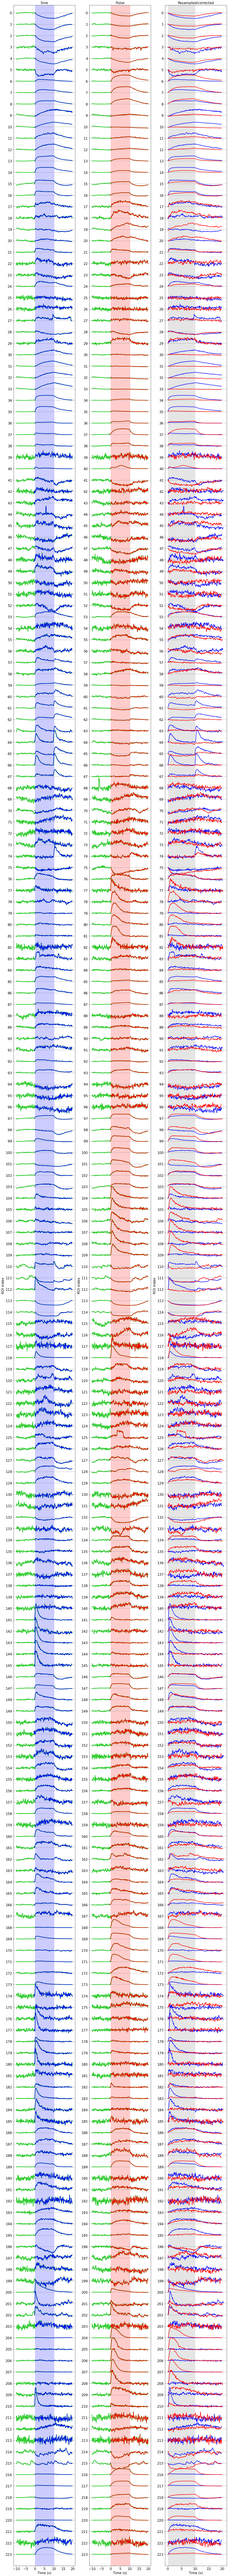

In [7]:
nplot = NNRN

fig, axs = plt.subplots(1, 3, figsize=(15, .75*nplot), tight_layout=True)

y_ticks = []
    
for cexpt, expt_id in enumerate(expt_ids):
    tstart_s = TSTARTS_S[cexpt]
    tstart_p = TSTARTS_P[cexpt]
    
    y_tick = -6*cexpt
    
    # sine response
    row_s = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'S')]
    rsp_s = (np.array(row_s).flatten()[6:]).astype(float)
    rsp_s_up = rsps_s_up[:, cexpt]
    
    axs[0].axhline(y_tick, lw=1, ls='--', c='gray')
    axs[0].plot(t, rsp_s + y_tick, lw=3, c='limegreen')
    axs[0].scatter(tstart_s, y_tick, marker='|', lw=2, c='k')
    axs[0].plot(TRESAMPLE+tstart_s, rsp_s_up + y_tick, c='b', lw=2)
    
    # pulse response
    row_p = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'P')]
    rsp_p = (np.array(row_p).flatten()[6:]).astype(float)
    
    rsp_p_up = rsps_p_up[:, cexpt]
    
    axs[1].axhline(y_tick, lw=1, ls='--', c='gray')
    axs[1].plot(t, rsp_p + y_tick, lw=3, c='limegreen')
    axs[1].scatter(tstart_p, y_tick, marker='|', lw=2, c='k')
    axs[1].plot(TRESAMPLE+tstart_p, rsp_p_up + y_tick, c='r', lw=2)
    
    axs[2].axhline(y_tick, lw=1, ls='--', c='gray')
    axs[2].plot(TRESAMPLE, rsp_s_up + y_tick, c='b', lw=2)
    axs[2].plot(TRESAMPLE, rsp_p_up + y_tick, c='r', lw=2)
    
    y_ticks.append(y_tick)

axs[2].axvspan(0, 10, color='gray', alpha=.2)
    
for ax, c, stim in zip(axs, ['b', 'r'], ['Sine', 'Pulse']):
    ax.axvspan(t[ISTART_STIM], t[ISTOP_STIM], color=c, alpha=.2)
    set_plot(ax, y_lim=(-6*nplot, 4), y_ticks=y_ticks, y_tick_labels=np.arange(NNRN), x_label='Time (s)', y_label='ROI index', title=stim, font_size=16)
    
set_plot(axs[2], y_lim=(-6*nplot, 4), y_ticks=y_ticks, y_tick_labels=np.arange(NNRN), x_label='Time (s)', y_label='ROI index', title='Resampled/corrected', font_size=16)